<a href="https://colab.research.google.com/github/SGhuman123/Data-Science-Portfolio/blob/main/Udemy%20TensorFlow%20Developer%20Certificate%20Bootcamp/Section%201%20Neural%20Networks%20Regression/01_Exercises_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 01_Neural_network_regression_in_Tensorflow Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  - Building a larger model (how does one with 4 dense layers go?).
  - Increasing the number of units in each layer.
  - Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
  - What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the Boston pricing dataset from TensorFlow `tf.keras.datasets` and model it.

## Load up the necessary libraries

In [ ]:
# Import TensorFlow
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


## 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it. && 4. Import the Boston pricing dataset from TensorFlow `tf.keras.datasets` and model it.


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=43)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(404, 13) (404,)
(102, 13) (102,)


In [ ]:
X_test

array([[3.7680e-02, 8.0000e+01, 1.5200e+00, ..., 1.2600e+01, 3.9220e+02,
        6.6200e+00],
       [2.1977e-01, 0.0000e+00, 6.9100e+00, ..., 1.7900e+01, 3.9690e+02,
        1.6200e+01],
       [6.4660e-02, 7.0000e+01, 2.2400e+00, ..., 1.4800e+01, 3.6824e+02,
        4.9700e+00],
       ...,
       [3.5480e-02, 8.0000e+01, 3.6400e+00, ..., 1.6400e+01, 3.9518e+02,
        9.2500e+00],
       [1.6760e-01, 0.0000e+00, 7.3800e+00, ..., 1.9600e+01, 3.9690e+02,
        7.2000e+00],
       [3.4109e-01, 0.0000e+00, 7.3800e+00, ..., 1.9600e+01, 3.9690e+02,
        6.1200e+00]])

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

## 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform? && 3. Try and improve the results we got on the insurance dataset

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
housing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compule the model
housing_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = housing_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 53.1389 - mae: 53.1389
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 26.1878 - mae: 26.1878
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 14.2864 - mae: 14.2864
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 8.4310 - mae: 8.4310
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 6.6288 - mae: 6.6288
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 6.7589 - mae: 6.7589
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 6.8153 - mae: 6.8153
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 6.1075 - mae: 6.1075
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 6.1520 - mae: 6.1520
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 6.1545 - mae: 6.1545
Epoch 11/100
13/13 [==============================] -

In [ ]:
# Check the results of the insurance model on the test data
housing_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 6.0345 - mae: 6.0345


[6.034484386444092, 6.034484386444092]

Text(0.5, 0, 'epochs')

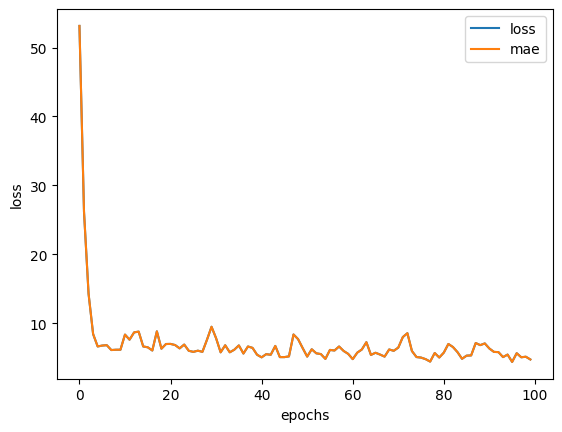

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")